In [ ]:
#######################################################################################
# Project "Developing predictive models for COVID-19 diagnosis in paediatric patients: 
#          A case study about the potentials of Machine Learning in Public Health"
#          By Anna Mas-Casadesús (https://github.com/amascasadesus)
#          July 2020
#
#          Notebook 3/6
#######################################################################################

### Import basic modules & datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import grid
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.graph_objs as go 
import plotly.offline as py
import plotly.tools as tls
import warnings
from warnings import simplefilter
warnings.filterwarnings('ignore')
simplefilter(action='ignore', category=FutureWarning)

In [2]:
symp_raw = pd.read_excel('symptoms_paediatric_original.xlsx')
symp = pd.read_csv('symptoms_paediatric_pp1.csv')
symp_sel = pd.read_csv('symptoms_paediatric_pp2_symp_sel.csv')
# Create checkpoints:
symp_raw_copy = symp_raw.copy()
symp_copy = symp.copy()
symp_sel_copy = symp_sel.copy()

### Variables frequency and Covid status

#### Raw dataset

[]

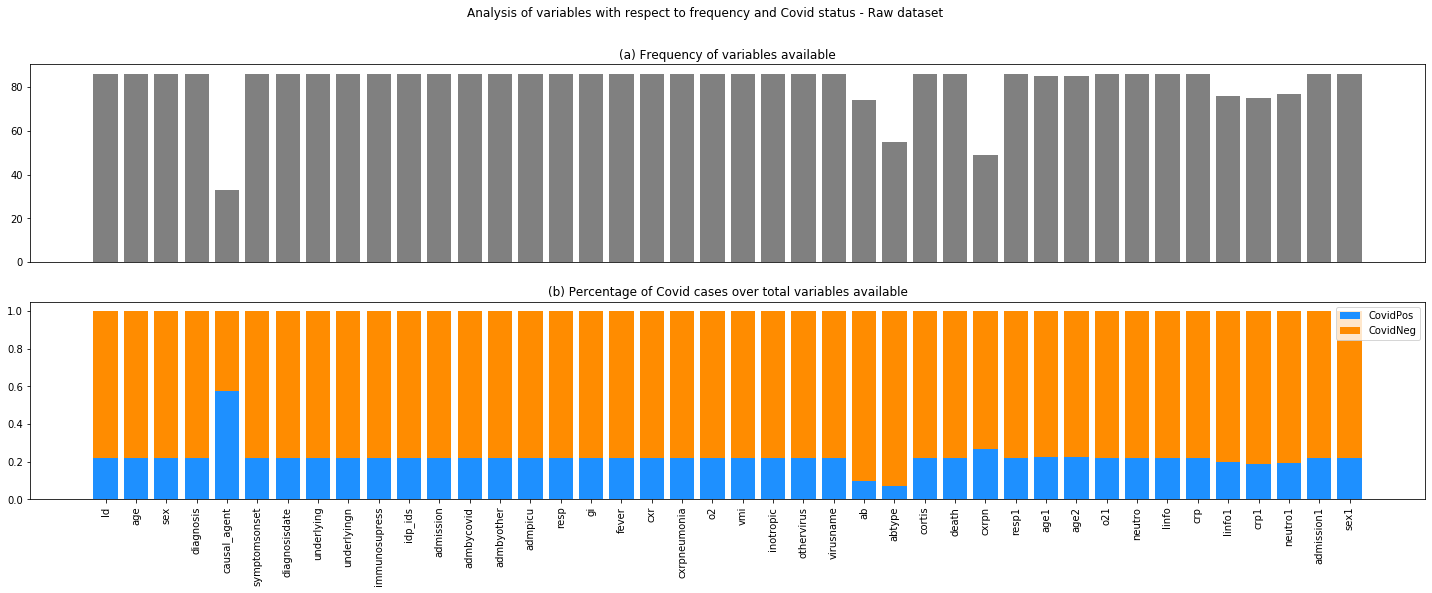

In [3]:
# Analysis of variables with respect to frequency and Covid status
symp_raw_copy2 = symp_raw.copy()
symp_raw_copy2.drop(['covi19'], axis=1, inplace=True) 
var = symp_raw_copy2.columns
var = list(var)

freqVar = symp_raw.shape[0] - symp_raw[var].isnull().sum()
covPos = (symp_raw[symp_raw['covi19']==1].shape[0]
         -symp_raw[symp_raw['covi19']==1][var].isnull().sum())/(symp_raw.shape[0] - symp_raw[var].isnull().sum())
covNeg = (symp_raw[symp_raw['covi19']==0].shape[0]
         -symp_raw[symp_raw['covi19']==0][var].isnull().sum())/(symp_raw.shape[0] - symp_raw[var].isnull().sum())
fig, axs = plt.subplots(2, 1, figsize=(25,8))
fig.patch.set_facecolor('white')

#Frequency plot
pFreqVar = axs[0].bar(var, freqVar, color='grey', )  
axs[0].set_title("(a) Frequency of variables available")
axs[0].get_xaxis().set_ticks([])

#Percentage of Covid cases over total tests performed
pCovPos = axs[1].bar(var, covPos, color='#1e90ff')
pCovNeg = axs[1].bar(var, covNeg, bottom=covPos, color='#ff8c00')
plt.xticks(var, var, rotation='vertical')
axs[1].set_title("(b) Percentage of Covid cases over total variables available")
axs[1].legend(["CovidPos", "CovidNeg"])

plt.xticks(var, var, rotation='vertical')

plt.subplots_adjust(hspace=0.2) 
fig.suptitle("Analysis of variables with respect to frequency and Covid status - Raw dataset")
plt.plot()

#### Pre-processed I dataset

[]

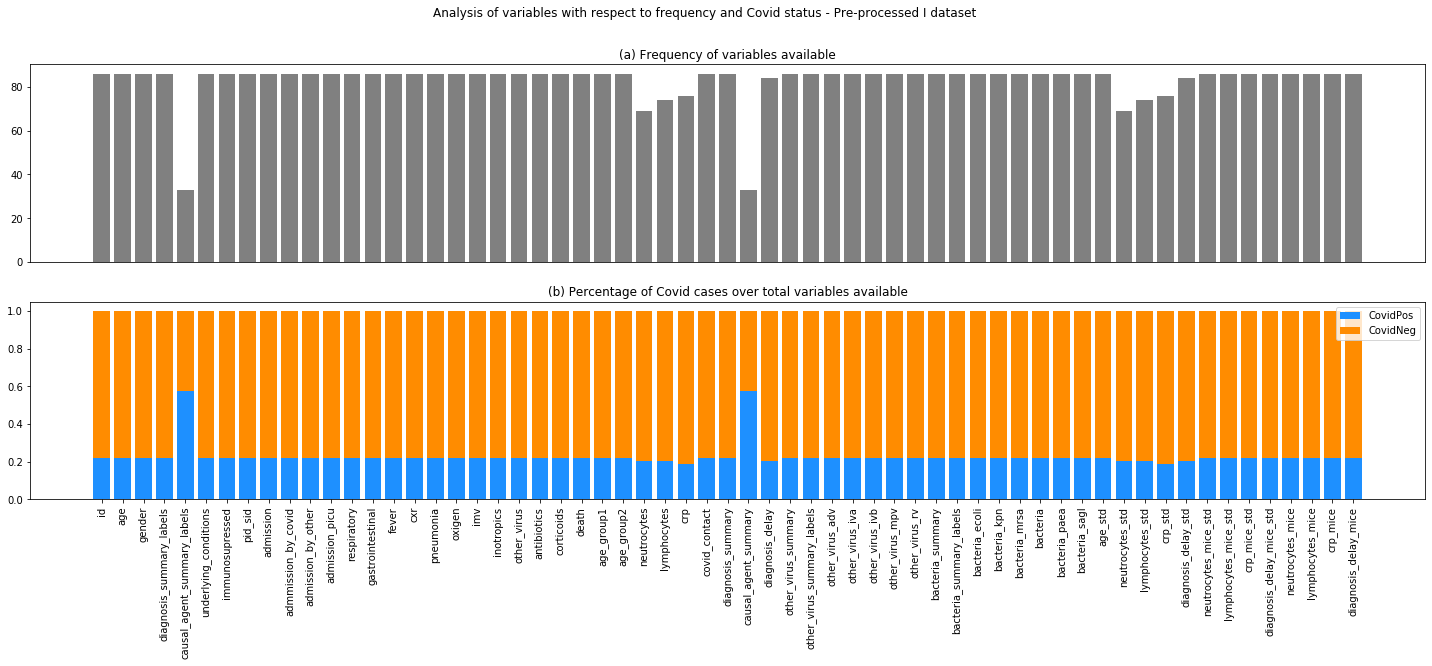

In [4]:
# Analysis of variables with respect to frequency and Covid status
symp_copy2 = symp.copy()
symp_copy2.drop(['diagnosis_covid'], axis=1, inplace=True) 
var = symp_copy2.columns
var = list(var)
freqVar = symp.shape[0] - symp[var].isnull().sum()

covPos = (symp[symp['diagnosis_covid']==1].shape[0]
         -symp[symp['diagnosis_covid']==1][var].isnull().sum())/(symp.shape[0] - symp[var].isnull().sum())
covNeg = (symp[symp['diagnosis_covid']==0].shape[0]
         -symp[symp['diagnosis_covid']==0][var].isnull().sum())/(symp.shape[0] - symp[var].isnull().sum())

fig, axs = plt.subplots(2, 1, figsize=(25,8))
fig.patch.set_facecolor('white')

#Frequency plot
pFreqVar = axs[0].bar(var, freqVar, color='grey', )  
axs[0].set_title("(a) Frequency of variables available")
axs[0].get_xaxis().set_ticks([])

#Percentage of Covid cases over total tests performed
pCovPos = axs[1].bar(var, covPos, color='#1e90ff')
pCovNeg = axs[1].bar(var, covNeg, bottom=covPos, color='#ff8c00')
plt.xticks(var, var, rotation='vertical')
axs[1].set_title("(b) Percentage of Covid cases over total variables available")
axs[1].legend(["CovidPos", "CovidNeg"])

plt.xticks(var, var, rotation='vertical')

plt.subplots_adjust(hspace=0.2) 
fig.suptitle("Analysis of variables with respect to frequency and Covid status - Pre-processed I dataset")
plt.plot()

#### Pre-processed II dataset

[]

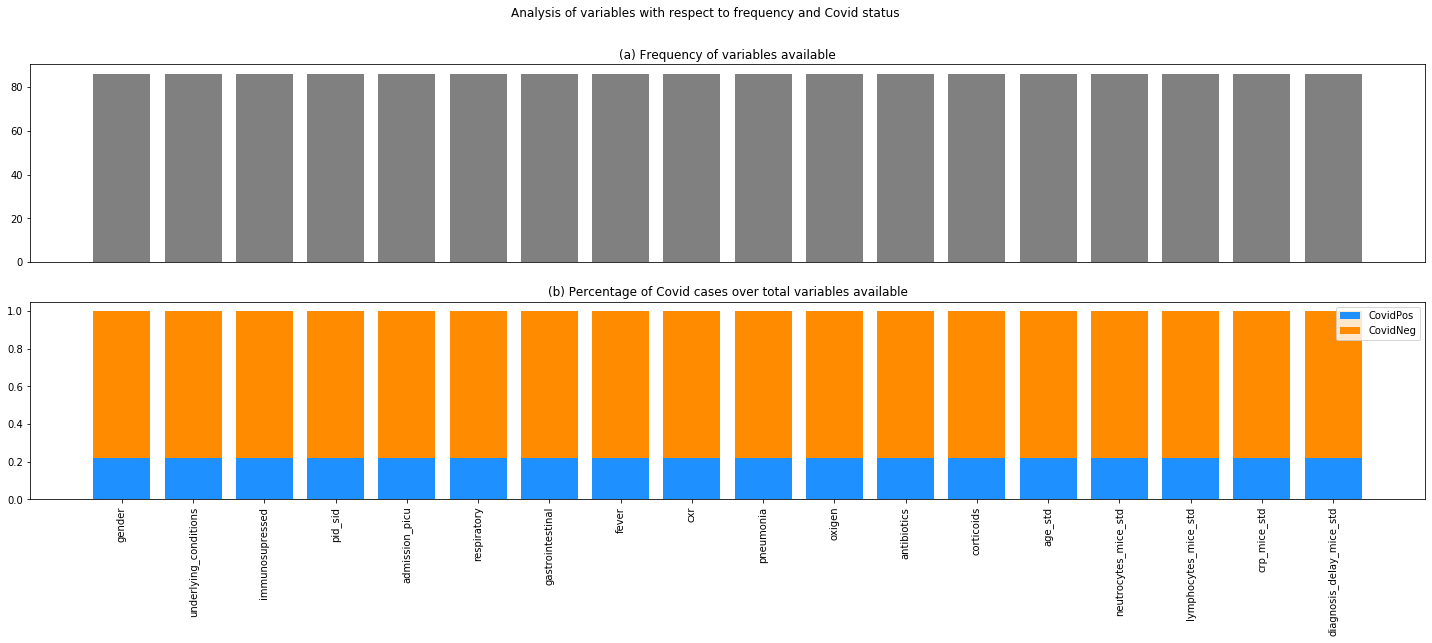

In [5]:
# Analysis of variables with respect to frequency and Covid status
symp_sel_copy2 = symp_sel.copy()
symp_sel_copy2.drop(['diagnosis_covid'], axis=1, inplace=True) 
var = symp_sel_copy2.columns
var = list(var)
freqVar = symp_sel.shape[0] - symp_sel[var].isnull().sum()

covPos = (symp_sel[symp_sel['diagnosis_covid']==1].shape[0]
         -symp_sel[symp_sel['diagnosis_covid']==1][var].isnull().sum())/(symp_sel.shape[0] - symp_sel[var].isnull().sum())
covNeg = (symp_sel[symp_sel['diagnosis_covid']==0].shape[0]
         -symp_sel[symp_sel['diagnosis_covid']==0][var].isnull().sum())/(symp_sel.shape[0] - symp_sel[var].isnull().sum())

fig, axs = plt.subplots(2, 1, figsize=(25,8))
fig.patch.set_facecolor('white')

#Frequency plot
pFreqVar = axs[0].bar(var, freqVar, color='grey', )  
axs[0].set_title("(a) Frequency of variables available")
axs[0].get_xaxis().set_ticks([])

#Percentage of Covid cases over total tests performed
pCovPos = axs[1].bar(var, covPos, color='#1e90ff')
pCovNeg = axs[1].bar(var, covNeg, bottom=covPos, color='#ff8c00')
plt.xticks(var, var, rotation='vertical')
axs[1].set_title("(b) Percentage of Covid cases over total variables available")
axs[1].legend(["CovidPos", "CovidNeg"])

plt.xticks(var, var, rotation='vertical')

plt.subplots_adjust(hspace=0.2) 
fig.suptitle("Analysis of variables with respect to frequency and Covid status")
plt.plot()

### EDA 

#### Categorical variables

In [6]:
# Get columns names
symp_sel.columns

Index(['gender', 'diagnosis_covid', 'underlying_conditions', 'immunosupressed',
       'pid_sid', 'admission_picu', 'respiratory', 'gastrointestinal', 'fever',
       'cxr', 'pneumonia', 'oxigen', 'antibiotics', 'corticoids', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std'],
      dtype='object')

In [7]:
# Select categorical variables
symp_sel_copy3 = symp_sel.copy()
symp_sel_copy3.drop(['diagnosis_covid','age_std','neutrocytes_mice_std','lymphocytes_mice_std',
                    'crp_mice_std','diagnosis_delay_mice_std'], axis=1, inplace=True) 
cat_var = symp_sel_copy3.columns
cat_var = list(cat_var)

In [8]:
# Rename `gender` in cat_var list
cat_var[0] = "male"
cat_var

['male',
 'underlying_conditions',
 'immunosupressed',
 'pid_sid',
 'admission_picu',
 'respiratory',
 'gastrointestinal',
 'fever',
 'cxr',
 'pneumonia',
 'oxigen',
 'antibiotics',
 'corticoids']

In [9]:
# Rename  `gender`in symp_sel
symp_sel.columns = ['male', 'diagnosis_covid', 'underlying_conditions', 'immunosupressed',
       'pid_sid', 'admission_picu', 'respiratory', 'gastrointestinal', 'fever',
       'cxr', 'pneumonia', 'oxigen', 'antibiotics', 'corticoids', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std']
symp_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   male                      86 non-null     int64  
 1   diagnosis_covid           86 non-null     int64  
 2   underlying_conditions     86 non-null     int64  
 3   immunosupressed           86 non-null     int64  
 4   pid_sid                   86 non-null     int64  
 5   admission_picu            86 non-null     int64  
 6   respiratory               86 non-null     int64  
 7   gastrointestinal          86 non-null     int64  
 8   fever                     86 non-null     int64  
 9   cxr                       86 non-null     int64  
 10  pneumonia                 86 non-null     int64  
 11  oxigen                    86 non-null     int64  
 12  antibiotics               86 non-null     float64
 13  corticoids                86 non-null     int64  
 14  age_std     

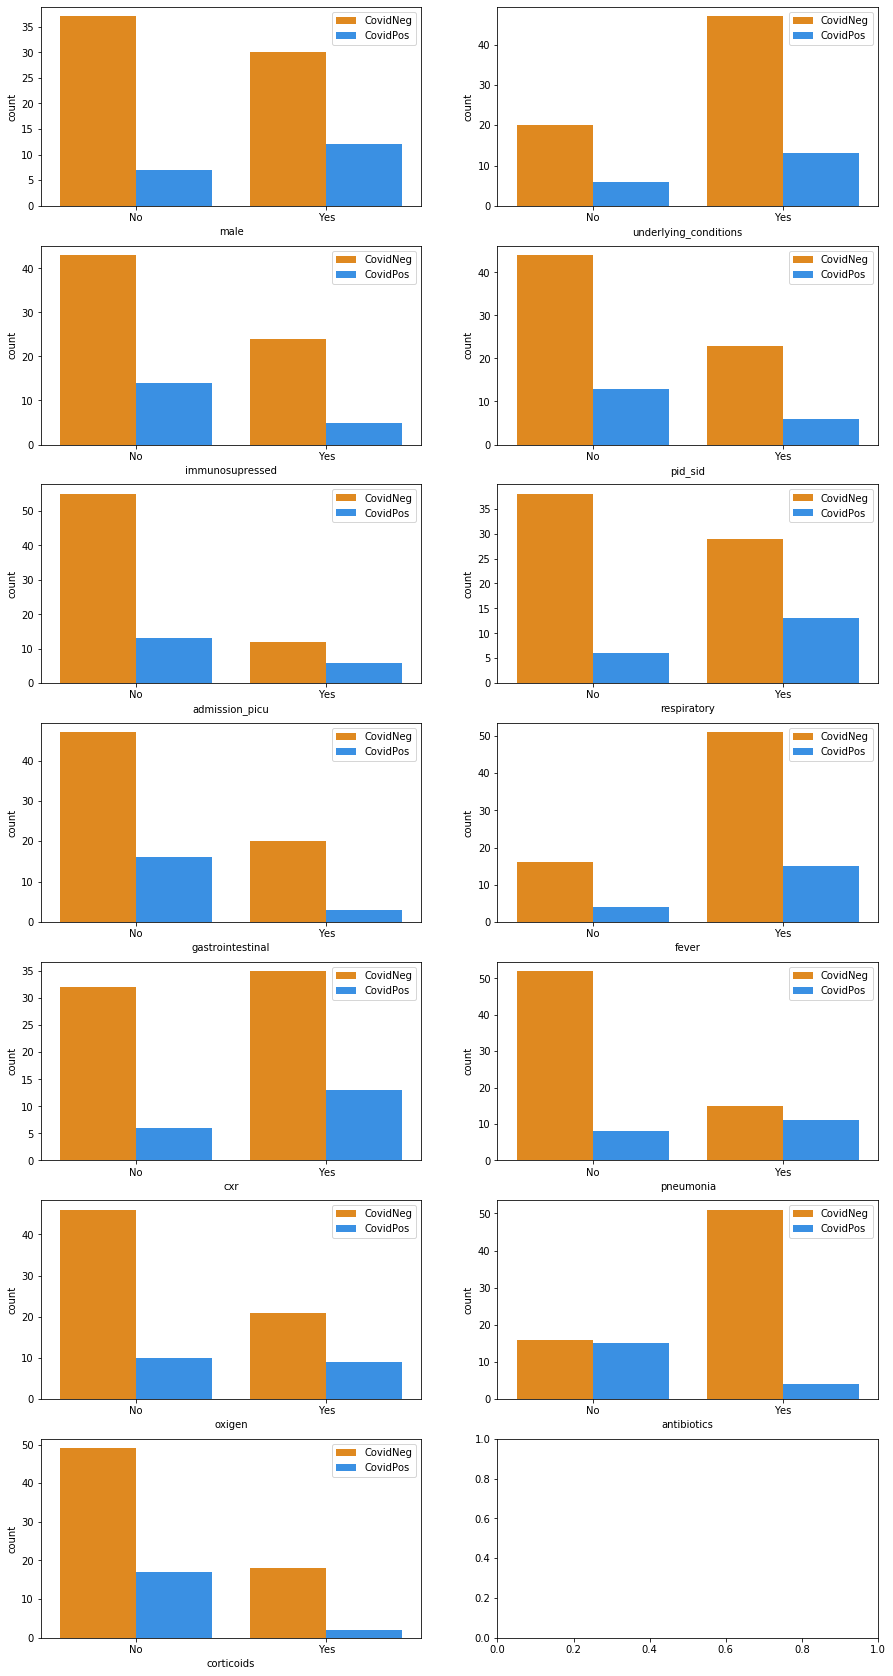

In [10]:
# Covid count plots by the different categorical variables 
labels = ["CovidNeg", "CovidPos"]
newPal = ["#ff8c00", "#1e90ff"]
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,30))
r = 0 # Index row
c = 0 # Index col
cat_var 
for f in cat_var:
    # Count plot
    sns.countplot(x=f, hue='diagnosis_covid', data=symp_sel,ax=axes[r][c], palette=newPal)
    # Plot configuration
    axes[r][c].legend(labels, loc='upper right')
    axes[r][c].set_xticklabels(["No", "Yes"])
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1

#### Numerical variables

In [11]:
# Get columns names
symp_sel.columns

Index(['male', 'diagnosis_covid', 'underlying_conditions', 'immunosupressed',
       'pid_sid', 'admission_picu', 'respiratory', 'gastrointestinal', 'fever',
       'cxr', 'pneumonia', 'oxigen', 'antibiotics', 'corticoids', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std'],
      dtype='object')

In [12]:
# Select continous variables
symp_sel_copy4 = symp_sel.copy()
symp_sel_copy4.drop(['male', 'diagnosis_covid', 'underlying_conditions', 'immunosupressed',
                     'pid_sid', 'admission_picu', 'respiratory', 'gastrointestinal', 'fever',
                     'cxr', 'pneumonia', 'oxigen', 'antibiotics', 'corticoids'], axis=1, inplace=True) 
num_var = symp_sel_copy4.columns
num_var = list(num_var)

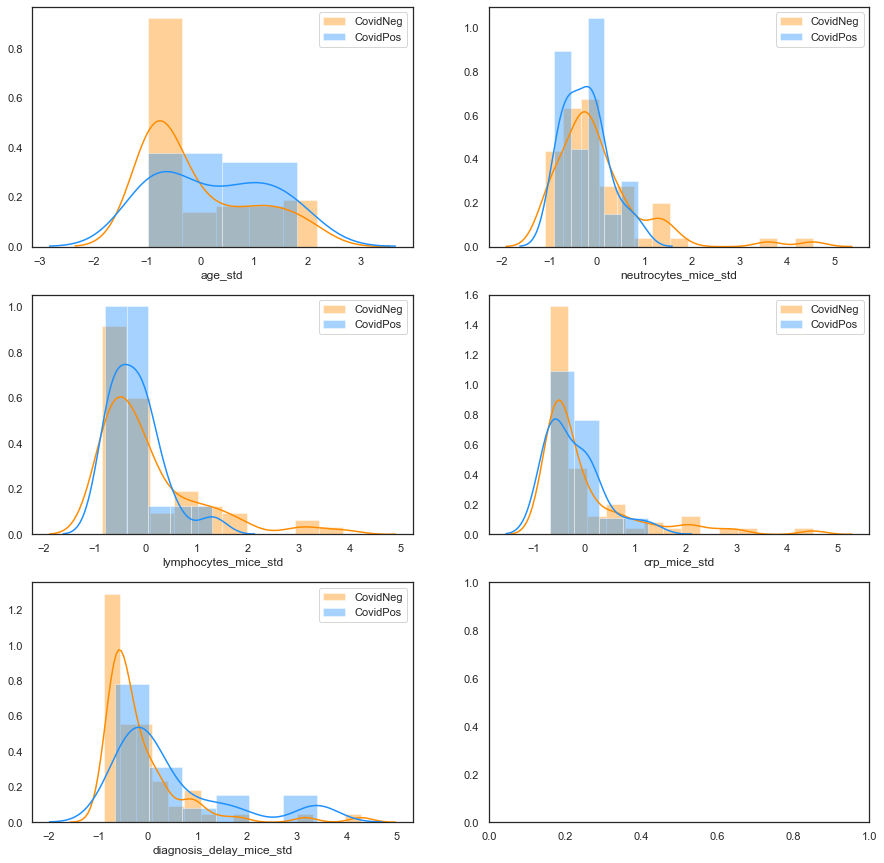

In [13]:
# Covid distribution plots by the different numerical variables 
labels = ["CovidNeg", "CovidPos"]
newPal = ["#ff8c00", "#1e90ff"]
sns.set(style="white", palette=newPal, color_codes=False)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
r = 0 # Index row
c = 0 # Index col
for f in num_var:
    # Distribution plot
    sns.distplot(symp_sel[symp_sel['diagnosis_covid'] == 0][f],label="CovidNeg",ax=axes[r][c])
    sns.distplot(symp_sel[symp_sel['diagnosis_covid'] == 1][f],label="CovidPos",ax=axes[r][c])
    # Plot configurations
    axes[r][c].legend(labels, loc='upper right')
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1